### DATA VISUALISATION SANS PREPROCESSING 

##### Affichage des images

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

train =os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Training")
test =os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Testing")

images_per_class = 3

# Fonction pour afficher des images
def display_images_from_folder(main_folder, images_per_class):
    classes = os.listdir(main_folder)  
    classes = [cls for cls in classes if os.path.isdir(os.path.join(main_folder, cls))]  

    for cls in classes:
        folder_path = os.path.join(main_folder, cls)
        images = os.listdir(folder_path)  
        print(f"Classe : {cls} ({len(images)} images)")
        
        plt.figure(figsize=(15, 5))
        for i, img_name in enumerate(images[:images_per_class]):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path)
                plt.subplot(1, images_per_class, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(cls)
            except Exception as e:
                print(f"Erreur avec l'image {img_name}: {e}")
        
        plt.show()


Classe : glioma_tumor (826 images)


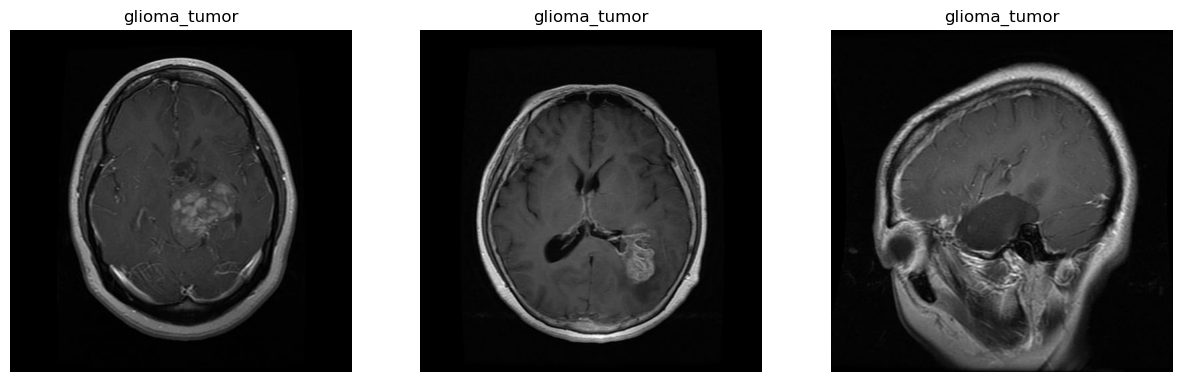

Classe : meningioma_tumor (822 images)


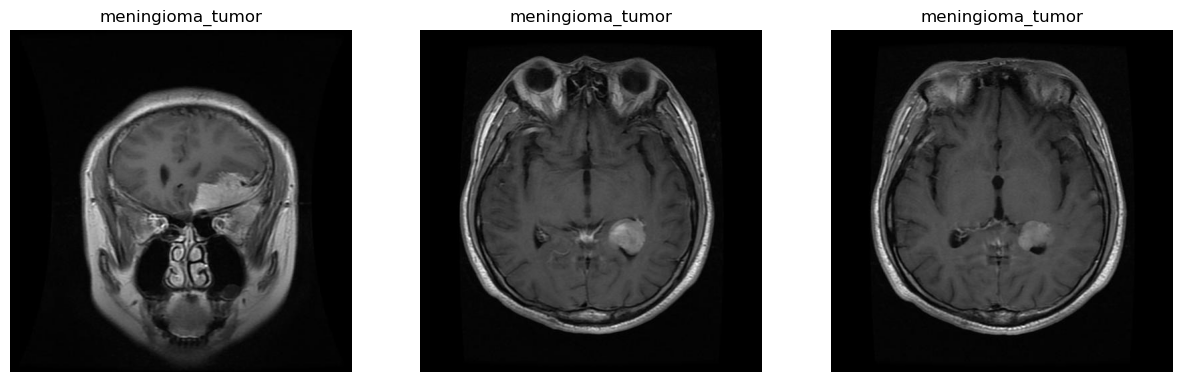

Classe : no_tumor (395 images)


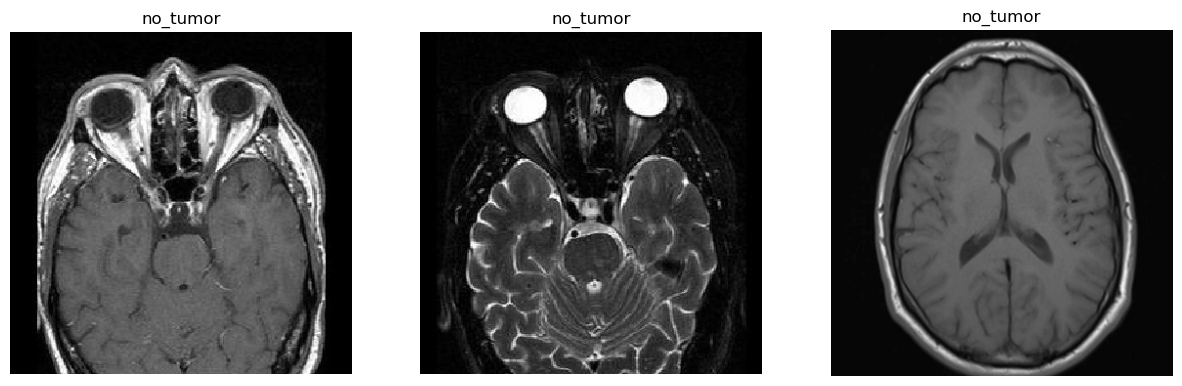

Classe : pituitary_tumor (827 images)


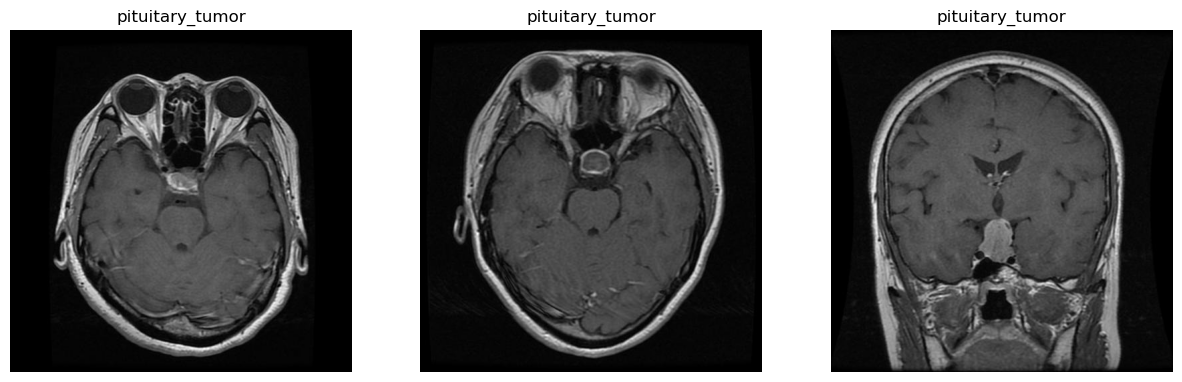

In [2]:
#Train visualisation

display_images_from_folder(train, images_per_class)

Classe : glioma_tumor (100 images)


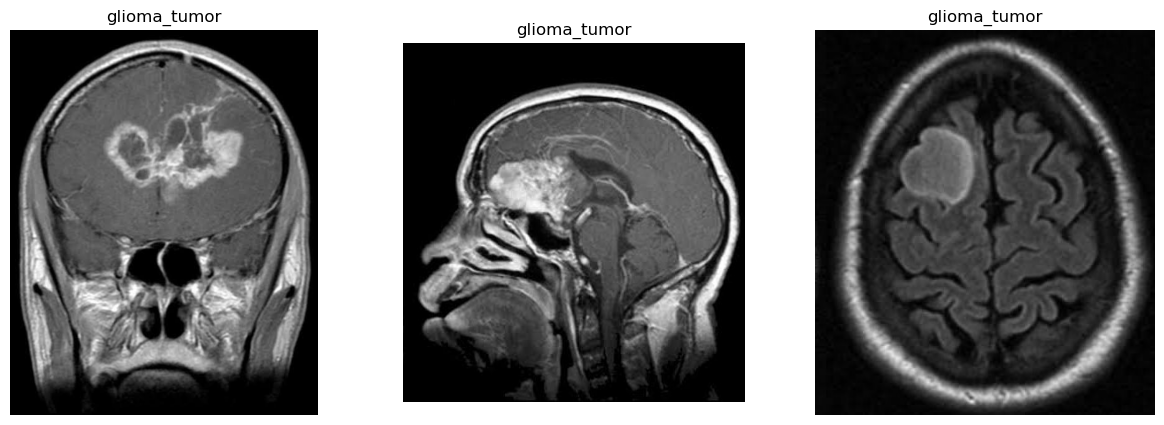

Classe : meningioma_tumor (115 images)


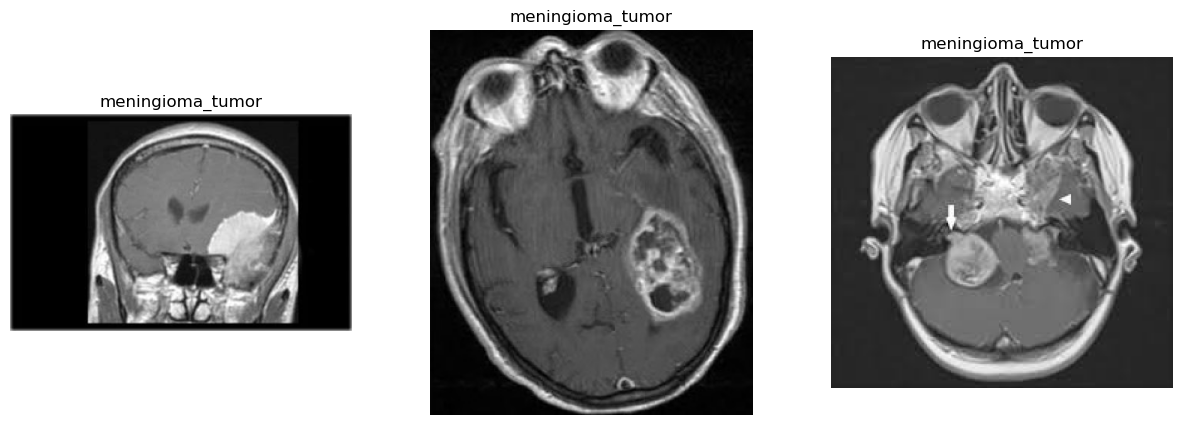

Classe : no_tumor (105 images)


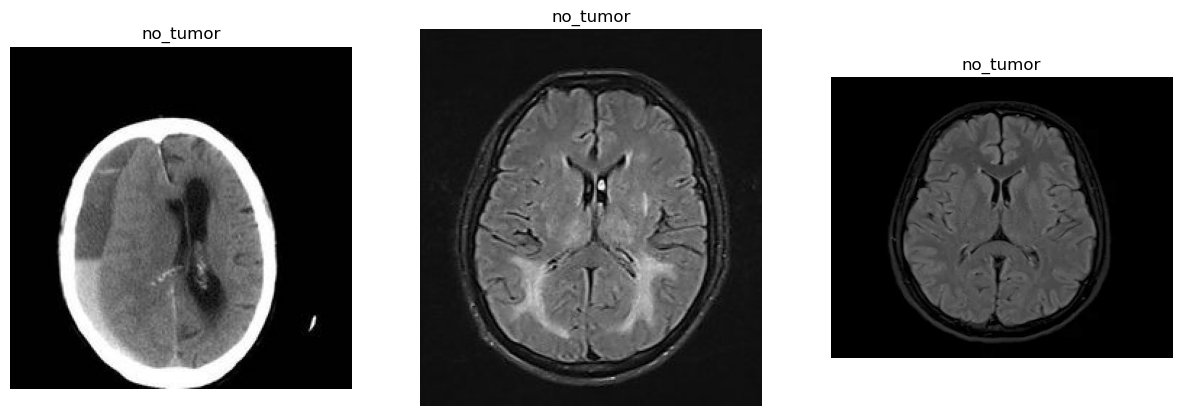

Classe : pituitary_tumor (74 images)


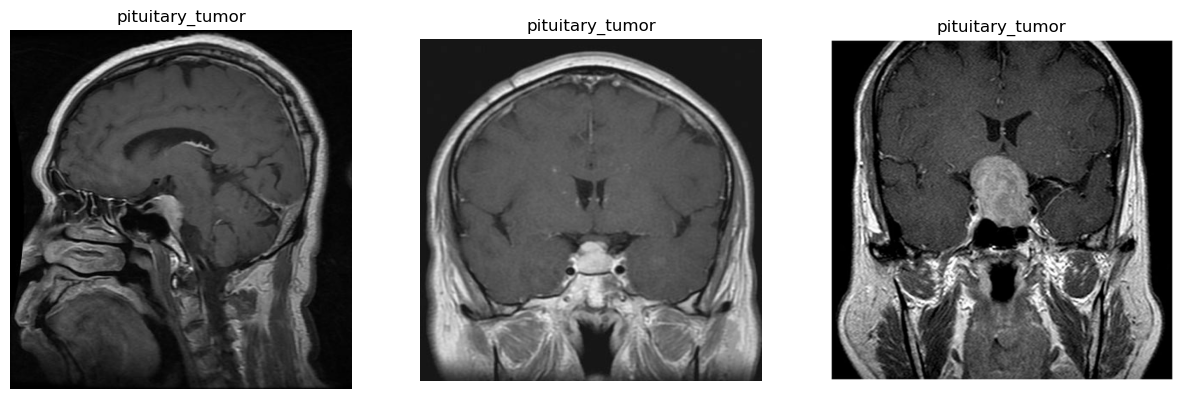

In [3]:
#test visualisation

display_images_from_folder(test, images_per_class)

### Repartition des classes 

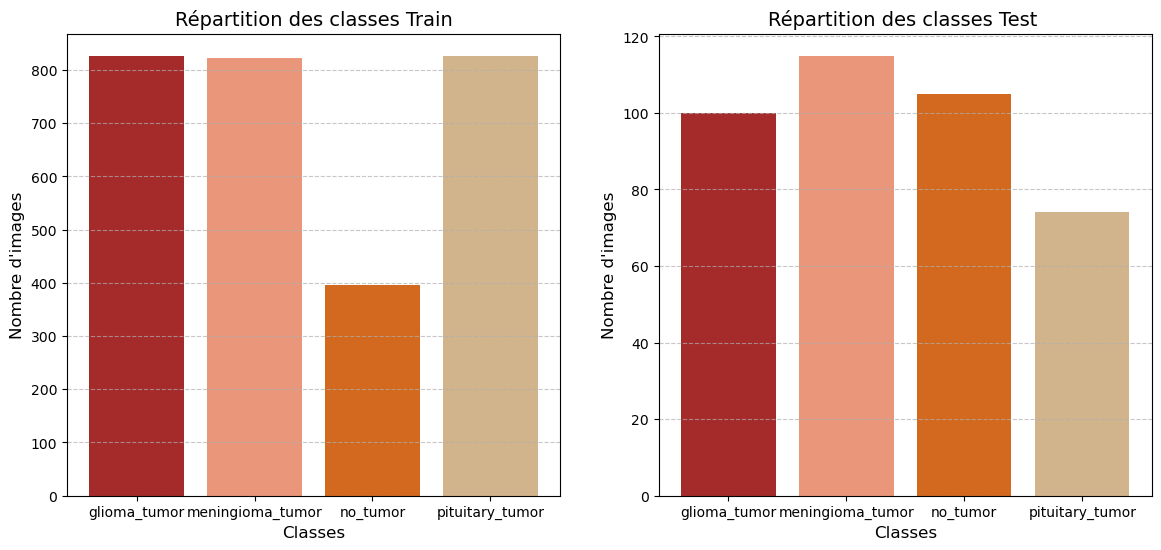

In [4]:
def count_images_by_class(main_folder):
    class_counts = {}
    classes = os.listdir(main_folder)
    for cls in classes:
        folder_path = os.path.join(main_folder, cls)
        if os.path.isdir(folder_path):
            count = len(os.listdir(folder_path)) 
            class_counts[cls] = count
    return class_counts

class_count_train = count_images_by_class(train)
class_count_test = count_images_by_class(test)

colors = ["brown", "darksalmon", "chocolate", "tan"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(class_count_train.keys(), class_count_train.values(), color=colors)
axes[0].set_title("Répartition des classes Train", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Nombre d'images", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

axes[1].bar(class_count_test.keys(), class_count_test.values(), color=colors)
axes[1].set_title("Répartition des classes Test ", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_ylabel("Nombre d'images", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### DATA VISUALISATION AVEC PREPROCESSING

In [5]:
import preprocessing

Nombre d'images dans chaque classe d'entraînement :
resized_glioma_tumor_256 : 661 images
resized_meningioma_tumor_256 : 658 images
resized_no_tumor_256 : 316 images
resized_pituitary_tumor_256 : 662 images

Nombre d'images dans chaque classe de validation :
resized_glioma_tumor_256 : 165 images
resized_meningioma_tumor_256 : 164 images
resized_no_tumor_256 : 79 images
resized_pituitary_tumor_256 : 165 images


In [6]:
training = os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Training")
validation = os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")), "data", "Validation")

In [15]:
def display_preprocessed_images_from_folder(main_folder, images_per_class, prefix="resized_"):
    classes = [cls for cls in os.listdir(main_folder) if cls.startswith(prefix) and os.path.isdir(os.path.join(main_folder, cls))]

    for cls in sorted(classes):  
        folder_path = os.path.join(main_folder, cls)
        images = [img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
        if not images: 
            print(f"Le dossier pour la classe {cls} est vide.")
            continue
        
        print(f"Classe : {cls} ({len(images)} images)")

        plt.figure(figsize=(15, 5))
        for i, img_name in enumerate(images[:images_per_class]):  # Limiter au nombre demandé
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path)
                plt.subplot(1, images_per_class, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(cls)
            except Exception as e:
                print(f"Erreur avec l'image {img_name}: {e}")
        
        plt.show()


#### training prétraité

Classe : resized_glioma_tumor_256 (661 images)


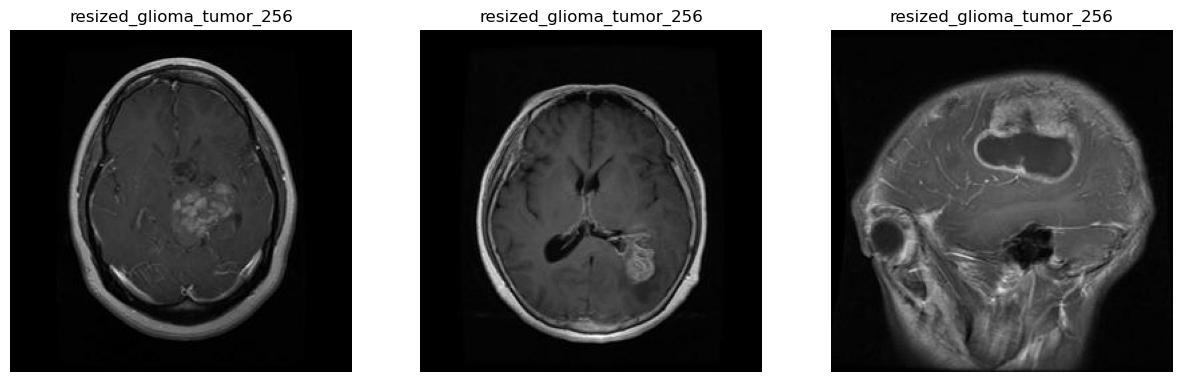

Classe : resized_meningioma_tumor_256 (658 images)


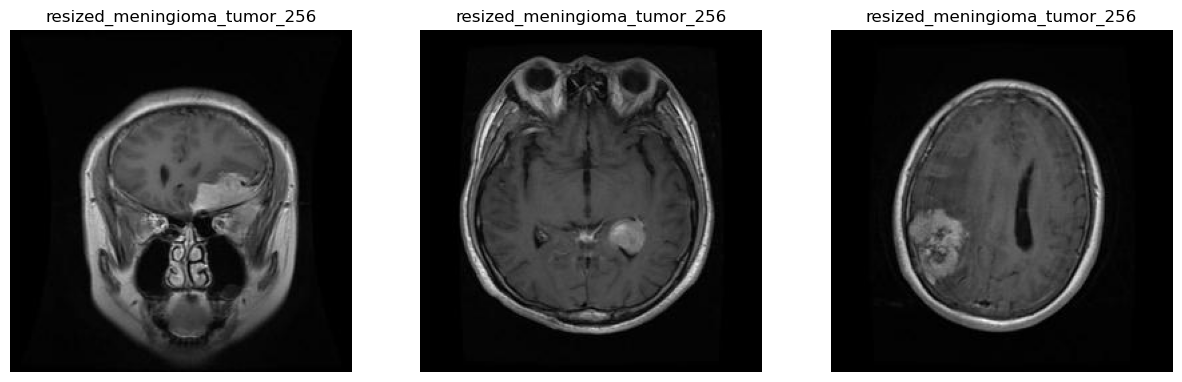

Classe : resized_no_tumor_256 (316 images)


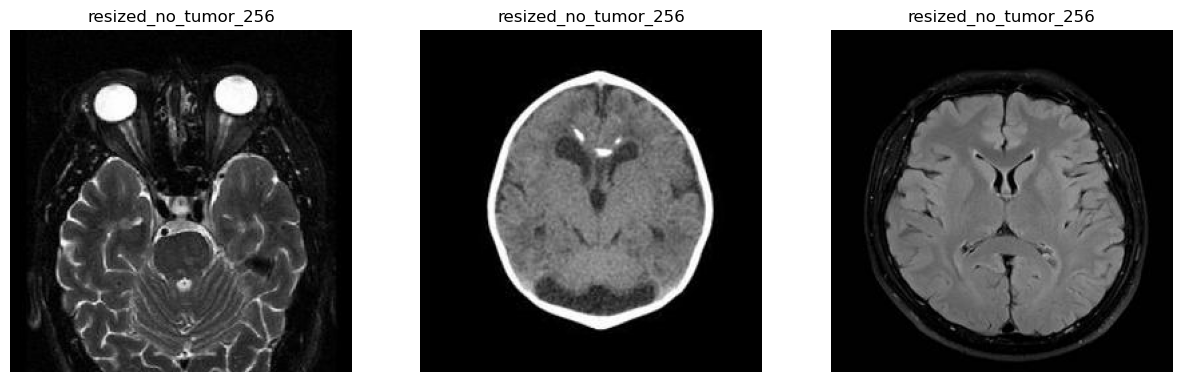

Classe : resized_pituitary_tumor_256 (662 images)


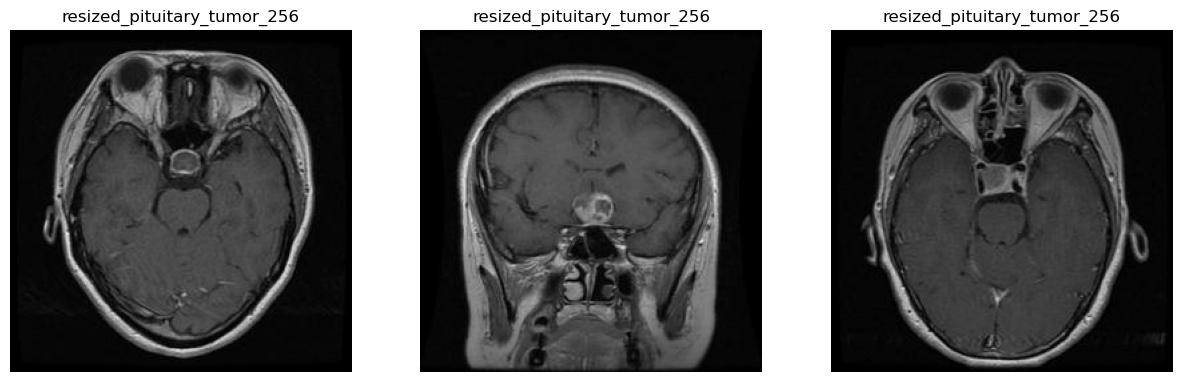

In [16]:
display_preprocessed_images_from_folder(training,images_per_class, prefix="resized_")

#### Validation

Classe : resized_glioma_tumor_256 (165 images)


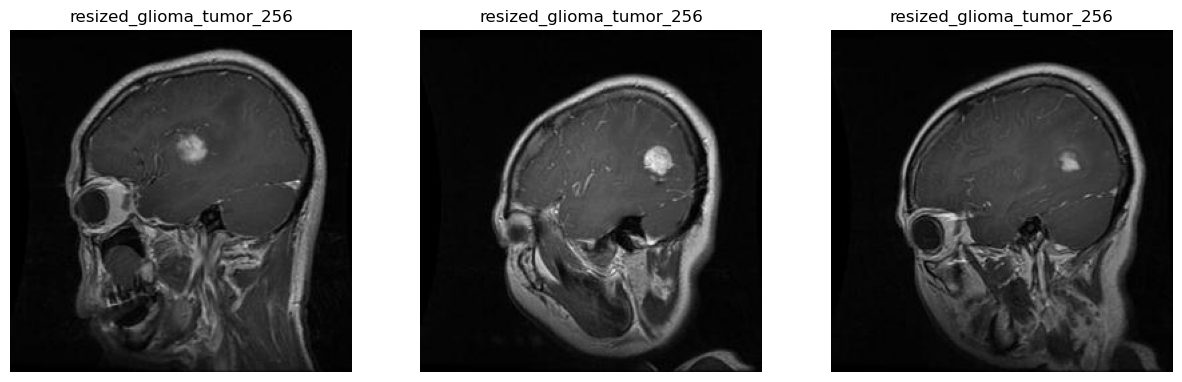

Classe : resized_meningioma_tumor_256 (164 images)


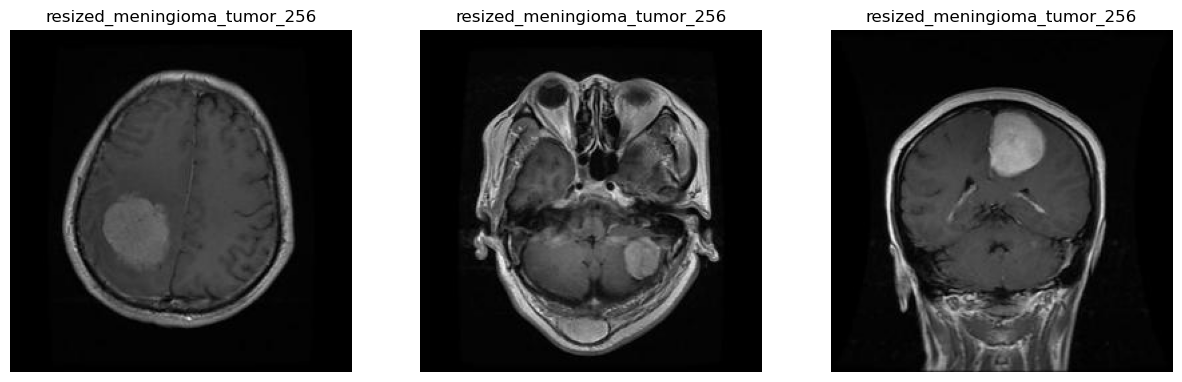

Classe : resized_no_tumor_256 (79 images)


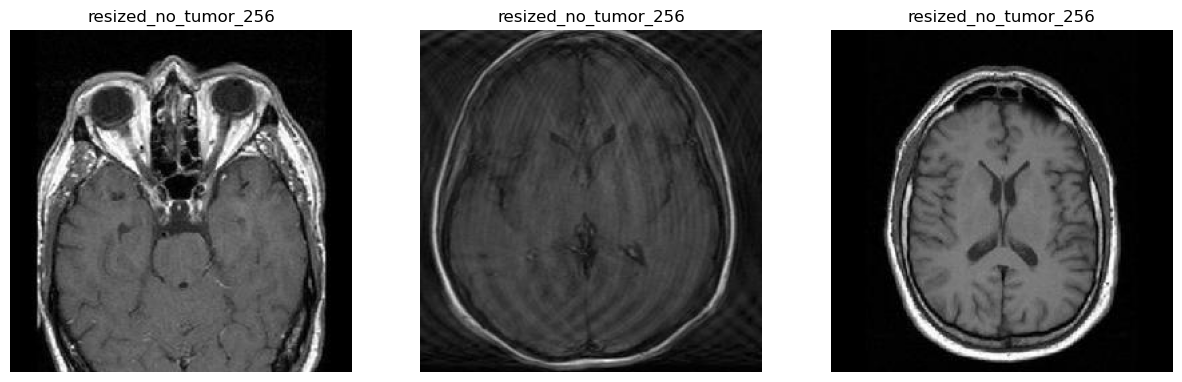

Classe : resized_pituitary_tumor_256 (165 images)


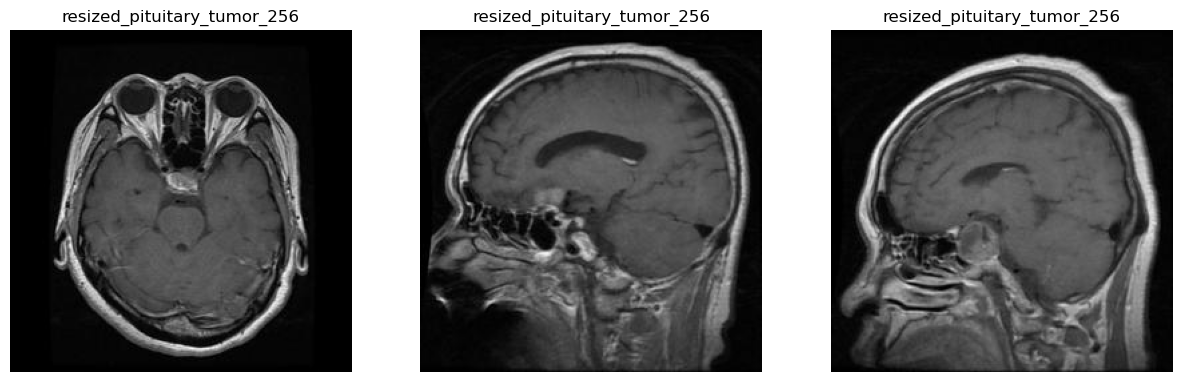

In [17]:
display_preprocessed_images_from_folder(validation,images_per_class, prefix="resized_")

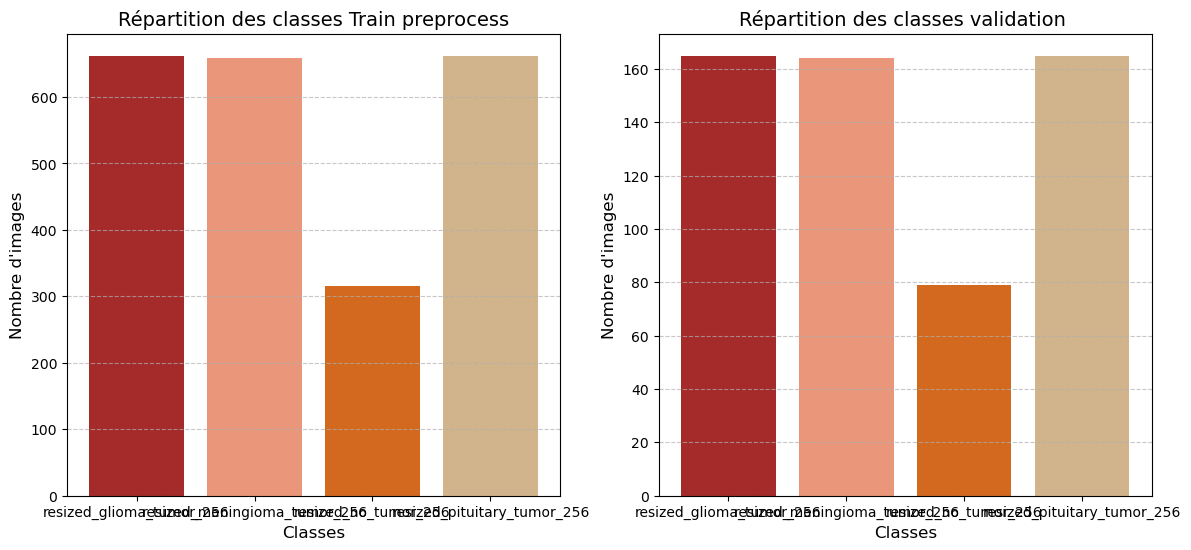

In [23]:
def count_preprocessed_images_by_class(main_folder, prefix="resized_"):
    class_counts = {}
    classes = [cls for cls in os.listdir(main_folder) if cls.startswith(prefix) and os.path.isdir(os.path.join(main_folder, cls))]
    
    for cls in classes:
        folder_path = os.path.join(main_folder, cls)
        count = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[cls] = count
    
    return class_counts


class_count_train_pret = count_preprocessed_images_by_class(training)
class_count_val = count_preprocessed_images_by_class(validation)

colors = ["brown", "darksalmon", "chocolate", "tan"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(class_count_train_pret.keys(), class_count_train_pret.values(), color=colors)
axes[0].set_title("Répartition des classes Train preprocess", fontsize=14)
axes[0].set_xlabel("Classes", fontsize=12)
axes[0].set_ylabel("Nombre d'images", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

axes[1].bar(class_count_val.keys(), class_count_val.values(), color=colors)
axes[1].set_title("Répartition des classes validation ", fontsize=14)
axes[1].set_xlabel("Classes", fontsize=12)
axes[1].set_ylabel("Nombre d'images", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### variance inter classe

In [26]:
import numpy as np

def calculate_between_class_variance(main_folder, prefix="resized_"):
    class_means = {}
    class_sizes = {}
    all_data = []

    # Lister les sous-dossiers correspondant aux classes prétraitées
    classes = [cls for cls in os.listdir(main_folder) if cls.startswith(prefix) and os.path.isdir(os.path.join(main_folder, cls))]

    # Charger les images par classe
    for cls in classes:
        folder_path = os.path.join(main_folder, cls)
        images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

        # Charger et aplatir les images
        image_vectors = []
        for img_path in images:
            img = Image.open(img_path)  # Les images sont déjà prétraitées
            img_array = np.array(img).flatten()  # Aplatir en vecteur 1D
            image_vectors.append(img_array)

        image_vectors = np.array(image_vectors)
        class_means[cls] = np.mean(image_vectors, axis=0)  # Moyenne par classe
        class_sizes[cls] = len(image_vectors)  # Taille de la classe
        all_data.append(image_vectors)

    # Calculer la moyenne globale
    all_data = np.vstack(all_data)  # Combiner toutes les données
    global_mean = np.mean(all_data, axis=0)

    # Calculer la variance inter-classe
    variance_inter_class = 0
    for cls, mean in class_means.items():
        n_k = class_sizes[cls]  # Taille de la classe
        variance_inter_class += n_k * np.sum((mean - global_mean) ** 2)

    return variance_inter_class

In [27]:
calculate_between_class_variance(training, prefix="resized_")

50487799049.59526

In [32]:
def calculate_within_class_variances(main_folder, prefix="resized_"):
    class_means = {}
    class_variances = {}  # Dictionnaire pour stocker les variances intra-classe
    class_sizes = {}

    # Lister les classes prétraitées uniquement
    classes = [cls for cls in os.listdir(main_folder) if cls.startswith(prefix) and os.path.isdir(os.path.join(main_folder, cls))]

    for cls in classes:
        folder_path = os.path.join(main_folder, cls)
        images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

        # Charger et aplatir les images
        image_vectors = []
        for img_path in images:
            img = Image.open(img_path)
            img_array = np.array(img).flatten()  # Aplatir l'image
            image_vectors.append(img_array)

        image_vectors = np.array(image_vectors)
        class_means[cls] = np.mean(image_vectors, axis=0)  # Moyenne de la classe
        class_sizes[cls] = len(image_vectors)  # Taille de la classe

        # Variance intra-classe pour cette classe
        variance_intra_class = np.sum((image_vectors - class_means[cls]) ** 2) / class_sizes[cls]
        class_variances[cls] = variance_intra_class

    return class_variances


#### Variance intra classe

In [ ]:
class_variances = calculate_within_class_variances(training)

for cls, variance in class_variances.items():
    print(f"Classe {cls} : Variance intra-classe = {variance}")


Classe resized_glioma_tumor_256 : Variance intra-classe = 178346470.0735555
Classe resized_meningioma_tumor_256 : Variance intra-classe = 330496060.5393776
Classe resized_no_tumor_256 : Variance intra-classe = 484557952.5108772
Classe resized_pituitary_tumor_256 : Variance intra-classe = 231571516.7505451
